In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from persim import PersistenceImager
import math
from math import pi
from numpy.linalg import norm as lnorm
from sympy.abc import t
from sympy import Piecewise
from sympy import diff, integrate
from itertools import combinations

In [62]:
def F_Image(PD1, PS, var, plot, D_Img=[], pers_imager=None, training=None):
    """
    This function computes the persistence images of given persistence diagrams
    using `Persim <https://persim.scikit-tda.org/en/latest/notebooks/Classification%20with%20persistence%20images.html>`_
    package of Python. Then it provides user with the feature matrix for the diagrams.

    Parameters
    ----------
    PD1 : ndarray
        Object array that includes all persistence diagrams.
    PS : float
        Pixel size.
    var : float
        Variance of the Gaussian distribution.
    plot : TYPE
        DESCRIPTION.
    D_Img : list, optional
        The number of persistence diagrams in a list. If this parameter is provided, algorithm will only plot the persistence images of these persistence diagrams.
        . The default is [].
    pers_imager : persistence image object, optional
        Persistence image object fit to training set diagrams. This oject is only required when the feature function
        for test set is computed. The default is None.
    training : boolean
        This flag tells function if user wants to compute the feature matrix for training and or test set. The default is None.


    Returns
    -------
    output : dict
        Includes feature matrix and persistence image object. Output object also includes figures if user selects to plot several persistence images.

    """

    output = {}
    # number of persistence diagrams
    N1 = len(PD1)

    pers_imager = PersistenceImager()
    pers_img = pers_imager.transform(PD1, skew=True)

    # generate feature matrix
    feature_PI = np.zeros(
        (N1, len(pers_img[0][:, 0])*len(pers_img[0][0, :])))
    for i in range(N1):
        feature_PI[i, :] = pers_img[i].flatten()

    # plot all images or images of certain persistence diagrams
    if plot == True:
        fig = []
        if D_Img == []:
            D_Img = np.arange(1, 2, 1)
        for i in range(len(D_Img)):
            plt.figure()
            ax = plt.gca()
            pimgr = PersistenceImager()
            pimgr.pixel_size = PS
            pimgr.kernel_params = {'sigma': var}
            pimgr.fit(PD1[D_Img[i]-1], skew=True)
            imgs = pimgr.transform(PD1[D_Img[i]-1], skew=True)
            pers_imager.plot_image(imgs, ax)
            fig.append(plt.gcf())
        output['figures'] = fig

    output['F_Matrix'] = feature_PI
    output['pers_imager'] = pers_imager

    return output


In [63]:
from teaspoon.MakeData.PointCloud import testSetManifolds

# generate persistence diagrams
df = testSetManifolds(numDgms = 50, numPts = 100)
Diagrams_H1= df['Dgm1'].sort_index().values
Diagrams_H1= Diagrams_H1[0]

TF_Learning = False
D_Img=[1,75]
feature_PI = F_Image(Diagrams_H1,0.01,0.15,False,TF_Learning, D_Img)
# if user wants to plot images
feature_PI = F_Image(Diagrams_H1,0.01,0.15,True,TF_Learning, D_Img)
fig = feature_PI['figures']

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [56]:
pers_imager = PersistenceImager()
PD1 = Diagrams_H1
N1 = len(PD1)
pers_img = pers_imager.transform(PD1, skew=True)

In [57]:
pers_img

array([[0.02843716, 0.02995213, 0.0304023 , 0.02973961, 0.02803645],
       [0.03385946, 0.03565252, 0.03617699, 0.03537693, 0.03333976],
       [0.03878973, 0.04082998, 0.04141603, 0.04048544, 0.03813995],
       [0.04275617, 0.044988  , 0.04561596, 0.04457322, 0.04197384],
       [0.04534491, 0.04769199, 0.04833707, 0.04721157, 0.04443866]])

In [32]:
type(Diagrams_H1)

numpy.ndarray

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


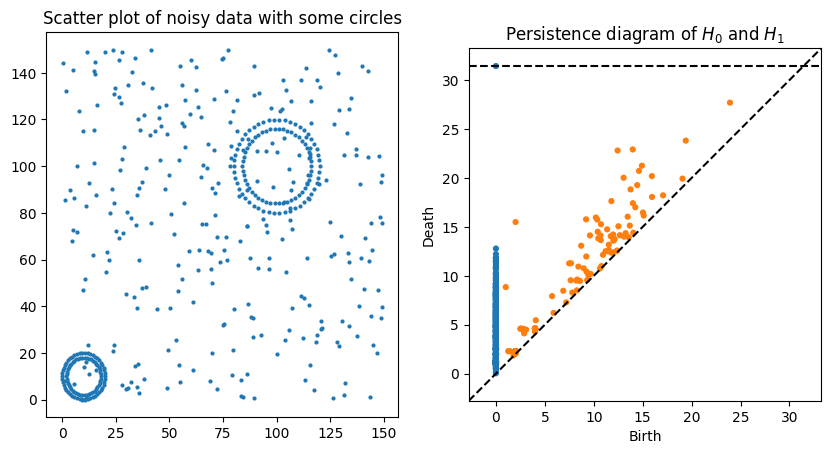

In [7]:
from sklearn import datasets
from ripser import Rips
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [34]:
len(H1_dgm)

162

In [38]:
H1_dgm[0]

array([23.92295647, 27.69663429])

In [36]:
H1_dgm.size

324

In [44]:
len(H1_dgm)

162

In [35]:
len(Diagrams_H1)

300

In [37]:
Diagrams_H1.size

300

In [42]:
Diagrams_H1[0].size

64

In [43]:
len(Diagrams_H1[0])

32

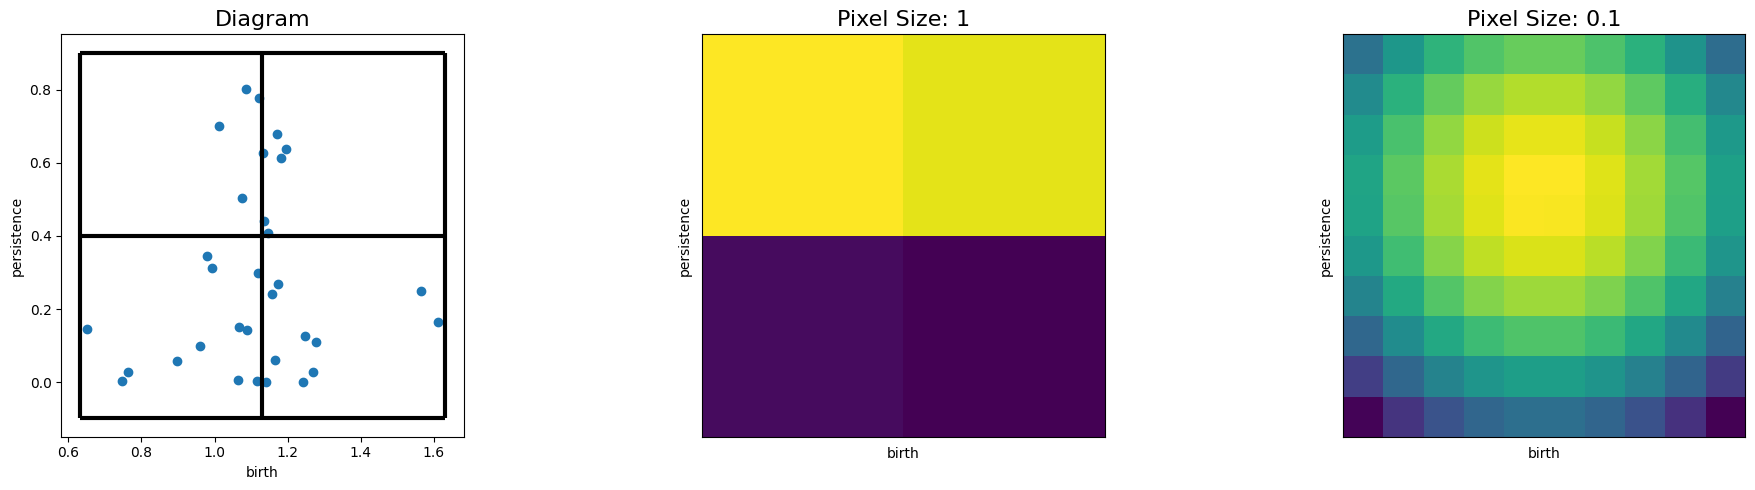

In [51]:
pimgr = PersistenceImager(pixel_size=.5)
pimgr.fit(Diagrams_H1[0])

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(Diagrams_H1[0], skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(Diagrams_H1[0]), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(Diagrams_H1[0]), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()

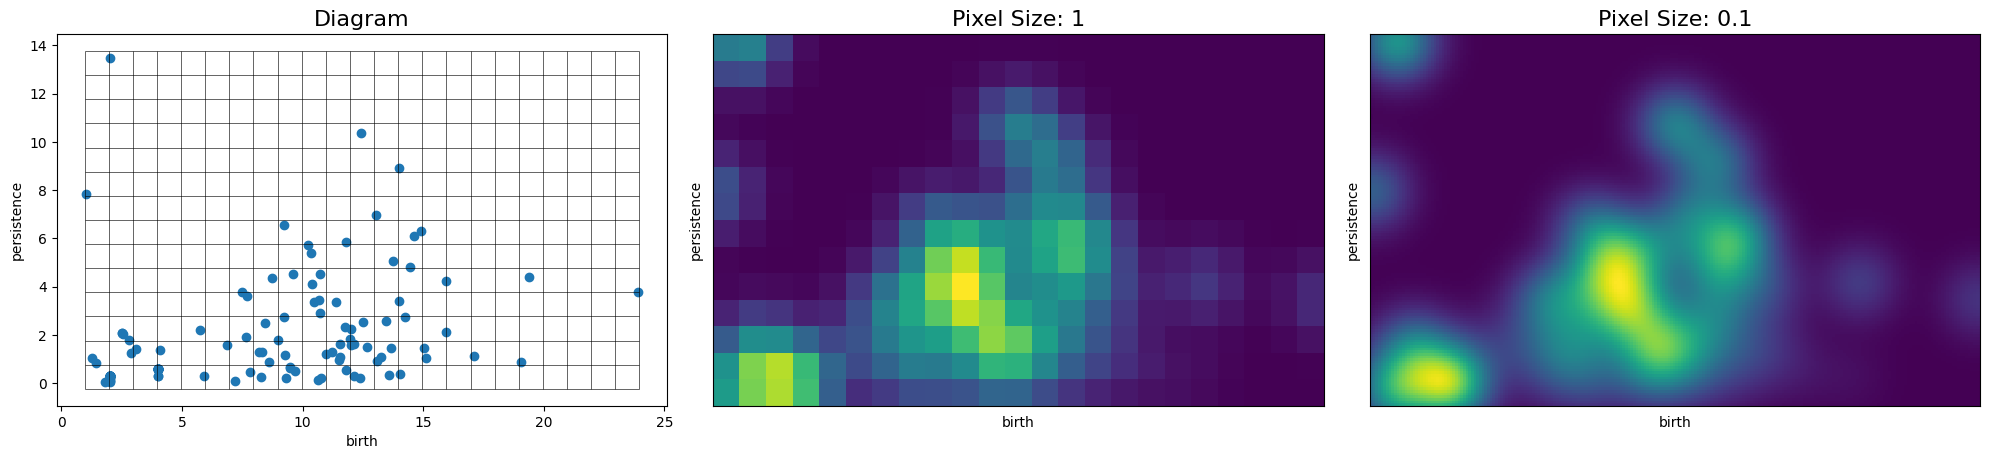

In [10]:

# The resolution of the persistence image is adjusted by choosing the pixel size, given in the same units as the diagram
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()